# Aprendizagem Automática - Classificação Parte 1
##  Gonçalo Marques 92630
##  Rita Leite 92646

### 6 novembro 2021

In [26]:
import numpy as np
import seaborn as sn
import pandas as pd
import random
import matplotlib.pyplot as plt

#sklearn
import sklearn as sk
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

#tensorflow, keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Read Data

In [2]:
X = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Classificação - Parte 1\\Xtrain_Classification_Part1.npy")
Y = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Classificação - Parte 1\\Ytrain_Classification_Part1.npy")
XTrue = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Classificação - Parte 1\\Xtest_Classification_Part1.npy")

# Reshape and Normalize
X = np.reshape(X, [6470, 50, 50,1])
X = X/255
XTrue = np.reshape(XTrue, [1164, 50, 50,1])
XTrue = XTrue/255

# Train / Test
Xtest = X[-1294:]
Ytest = Y[-1294:]

# Visualize

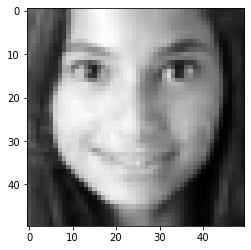

In [73]:
plt.imshow(X[420], cmap='gray')

# Generate New Images (Not Used!)

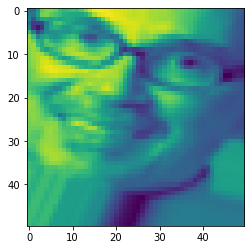

In [27]:
plus = [3959, 3752,  870, 2035, 3151, 3641, 3779, 3801, 4963, 4926, 4640, 2691, 4530,  443, 4078,  902, 2175, 1347,  550, 1113, 2027, 4787,1970, 4200, 4553, 4407, 1528, 1688, 1654, 4524,  955, 4727, 1967,4208, 1569, 1942,  469, 4616, 5122, 3462, 1320, 1364, 3457,  159,2062, 3653, 1679, 4996, 4849,  637, 2973, 3842, 3373, 4835,  204,2673, 2522, 2569, 4557, 4621, 2219,  174, 2531, 3615, 3898,  390,5143, 2457, 4360,  194, 4116, 1997, 1771, 4336, 2739,  320, 2667,2978,  104, 4236,  134,  487, 2476,  715, 3920, 3553, 1681, 2884,2087, 2779, 1954, 1526, 2809,  517, 4357, 2702, 5167, 3305, 1615,4686, 1519, 2719, 1747, 4920, 2801, 3498, 4042, 3034,  474, 3542,1484, 4092, 3975, 4694, 2992,  153, 4024, 2077, 4817, 1893, 5099, 284, 4259,  359, 4166, 2049, 2268,  538, 1811, 4149, 1737, 3799,3236, 1084, 4521, 5041,  888, 4764, 5101, 4132,  364, 4005, 1851,3860, 1736, 1388,  168, 5065,  368, 4839,  551,  881,  131, 4612,3443, 4758, 4322,  626, 1437, 4726, 4899, 1902,    6, 4987, 3969, 454,  769, 2838, 4909, 2307, 3297, 3590,  865,  315, 1462, 4201,2434, 3219, 4183, 5016, 3390, 4059,  640, 2695, 5171, 2382, 1783,3293, 1895, 1149, 2763, 1033,  353, 3552, 3978, 2176, 2740, 4998,1074, 4402, 1086, 3789, 1647, 2448, 3716, 2386, 3647, 3015, 3747,5008, 2444, 3855, 1563, 2127, 1393, 4414,  196,  227,  825,  250,4840,  846,  836, 4398, 3532, 3990, 1527, 1105, 4311,   12, 2728,1311, 2856, 4478, 1585, 3162, 3650, 1978,  705, 2377,  466,  130,1172,  917,   83, 3000, 3130,  980,  502, 1141, 1461, 2612, 3652,3931, 3048, 3894, 2547, 1521, 4609, 4763,  570, 1602, 2812, 2439,3758,  750, 2058,  831,  820, 3198,  744,  854,  898, 1250, 4348, 968,  527, 1896, 1961, 3470, 3528, 1916, 4865, 2450, 2142, 2034,1173, 3853, 2044, 4531,  520, 3102, 1532, 2687, 4901, 2036, 1219,4120, 1537, 4939, 4000, 3064,  270, 3493, 1758, 4664, 2993,  962,1646,  788, 4224, 4636, 2361, 2048, 1235, 4416,  824, 1196, 1940,3534, 4479, 2638, 1144, 1225, 2752, 2736, 2817, 4739,  163,  150,2958, 2407,  200, 1945, 4302, 1872,  606, 2637, 2033, 3150,  579, 531, 1767, 2441, 2396, 4889,  762, 5068,  700,  501, 1965, 2385,3628, 2111, 3577, 2458, 1216, 4705, 1738, 3775, 2126, 2374,  616,4055,  808, 2431, 2262, 1331, 1725,  826, 3232, 4352, 1278, 2225, 592, 4328,  848, 1133, 4215,  486,  952, 3028, 3709, 4949, 2780,3625, 4940,  382, 1252, 1414,  245,  678, 2309, 1511,  688, 1328,1478, 3890, 1269, 4556, 5092, 2709, 2278, 1641,  736, 2796, 5135,4044, 2913, 3713, 4017, 3439, 4297, 3436,  674, 2115, 3744, 2794, 263, 3985,  504,   55,  224,  573, 1163, 4041, 3685, 4206, 4383,5170, 3538, 4712, 3820, 4325, 3107,   54,  953, 5129, 5109, 3268, 400, 1345, 4469, 1463, 5070, 1544, 2160, 2095,  415, 1446,  990,2456, 3103, 3408,  829, 3911, 4496, 1090, 3774, 2811, 3252, 2243,3374, 3306, 3289,  182, 3376, 3174,  556, 3338, 2054, 1508, 3554,3968,  511,  125, 1634, 1998, 2269, 4253, 4994,  115, 1705, 1696,1300, 1568, 4566, 3131, 4243, 3223, 2182, 2842, 3467,  749,  650,5168, 1236, 3944, 3240, 4118]
Yplus = Y[plus]
Xplus = X[plus]

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Xplus2 = []
for j in range(len(Xplus)):
    img = Xplus[j]
    img = img.reshape((1,) + img.shape) 
    i=0
    for batch in datagen.flow(img, batch_size=1):
        plt.figure(i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i == 1:
            break
    Xplus2.append(batch[0])
Xplus2 = np.array(Xplus2)

# SVM

In [82]:
X2 = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Classificação - Parte 1\\Xtrain_Classification_Part1.npy")
Y2 = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Classificação - Parte 1\\Ytrain_Classification_Part1.npy")
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(X2, Y2, test_size=0.2, random_state=23)

clf = svm.SVC(kernel='rbf')
SVC = clf.fit(Xtrain2, Ytrain2)

In [81]:
Ytest_pred_SVC = clf.predict(Xtest2)
AccSVM = accuracy_score(Ytest2, Ytest_pred_SVC)
BAccSVM = balanced_accuracy_score(Ytest2, Ytest_pred_SVC)
print("Accuracy          -> ", np.round(AccSVM, 6), "%")
print("Balanced Accuracy -> ", np.round(BAccSVM, 6), "%")

Accuracy          ->  0.913447 %
Balanced Accuracy ->  0.91217 %


# Binary Neural Network A
### Create Neural Network

In [84]:
modelA = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
modelA.summary()
optimizer = RMSprop(learning_rate=0.0001)
modelA.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 6, 6, 128)        

### Train Neural Network

In [85]:
historyA = modelA.fit(x=X, y=Y, validation_split = 0.2, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
518/518 - 17s - loss: 0.6148 - accuracy: 0.6468 - val_loss: 0.5797 - val_accuracy: 0.6801
Epoch 2/30
518/518 - 17s - loss: 0.5196 - accuracy: 0.7421 - val_loss: 0.4673 - val_accuracy: 0.7898
Epoch 3/30
518/518 - 16s - loss: 0.4378 - accuracy: 0.8018 - val_loss: 0.4142 - val_accuracy: 0.8168
Epoch 4/30
518/518 - 16s - loss: 0.3870 - accuracy: 0.8267 - val_loss: 0.3698 - val_accuracy: 0.8331
Epoch 5/30
518/518 - 16s - loss: 0.3470 - accuracy: 0.8505 - val_loss: 0.3462 - val_accuracy: 0.8423
Epoch 6/30
518/518 - 16s - loss: 0.3112 - accuracy: 0.8626 - val_loss: 0.3417 - val_accuracy: 0.8524
Epoch 7/30
518/518 - 16s - loss: 0.2812 - accuracy: 0.8785 - val_loss: 0.3065 - val_accuracy: 0.8624
Epoch 8/30
518/518 - 16s - loss: 0.2559 - accuracy: 0.8953 - val_loss: 0.3278 - val_accuracy: 0.8563
Epoch 9/30
518/518 - 17s - loss: 0.2269 - accuracy: 0.9098 - val_loss: 0.2770 - val_accuracy: 0.8833
Epoch 10/30
518/518 - 17s - loss: 0.2038 - accuracy: 0.9198 - val_loss: 0.3231 - val_accura

# Binary Neural Network B
### Create Neural Network - with Dropout feature

In [88]:
modelB = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
modelB.summary()
optimizer = RMSprop(learning_rate=0.0001)
modelB.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 6, 6, 128)        

### Train Neural Network

In [89]:
historyB = modelB.fit(x=X, y=Y, validation_split = 0.2, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
518/518 - 18s - loss: 0.6308 - accuracy: 0.6258 - val_loss: 0.5899 - val_accuracy: 0.6793
Epoch 2/30
518/518 - 18s - loss: 0.5689 - accuracy: 0.6973 - val_loss: 0.5334 - val_accuracy: 0.7349
Epoch 3/30
518/518 - 17s - loss: 0.5010 - accuracy: 0.7560 - val_loss: 0.4563 - val_accuracy: 0.7929
Epoch 4/30
518/518 - 17s - loss: 0.4440 - accuracy: 0.7964 - val_loss: 0.4233 - val_accuracy: 0.8153
Epoch 5/30
518/518 - 17s - loss: 0.4042 - accuracy: 0.8205 - val_loss: 0.4027 - val_accuracy: 0.8138
Epoch 6/30
518/518 - 17s - loss: 0.3835 - accuracy: 0.8306 - val_loss: 0.3646 - val_accuracy: 0.8400
Epoch 7/30
518/518 - 17s - loss: 0.3502 - accuracy: 0.8478 - val_loss: 0.3396 - val_accuracy: 0.8509
Epoch 8/30
518/518 - 17s - loss: 0.3253 - accuracy: 0.8578 - val_loss: 0.3521 - val_accuracy: 0.8439
Epoch 9/30
518/518 - 18s - loss: 0.3061 - accuracy: 0.8669 - val_loss: 0.3134 - val_accuracy: 0.8671
Epoch 10/30
518/518 - 17s - loss: 0.2906 - accuracy: 0.8748 - val_loss: 0.2970 - val_accura

# Binary Neural Network C
### Create Neural Network

In [98]:
modelC = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

modelC.summary()
learning_rate_decay = ExponentialDecay(0.0001, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = RMSprop(learning_rate_decay)
modelC.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 6, 6, 128)       

### Train Neural Network

In [100]:
historyC = modelC.fit(x=X, y=Y, validation_split = 0.2, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
518/518 - 17s - loss: 0.6103 - accuracy: 0.6542 - val_loss: 0.5794 - val_accuracy: 0.6855
Epoch 2/30
518/518 - 17s - loss: 0.5478 - accuracy: 0.7160 - val_loss: 0.5082 - val_accuracy: 0.7504
Epoch 3/30
518/518 - 16s - loss: 0.4806 - accuracy: 0.7716 - val_loss: 0.4414 - val_accuracy: 0.7998
Epoch 4/30
518/518 - 17s - loss: 0.4356 - accuracy: 0.8002 - val_loss: 0.4080 - val_accuracy: 0.8277
Epoch 5/30
518/518 - 16s - loss: 0.4021 - accuracy: 0.8234 - val_loss: 0.3955 - val_accuracy: 0.8338
Epoch 6/30
518/518 - 17s - loss: 0.3736 - accuracy: 0.8308 - val_loss: 0.3532 - val_accuracy: 0.8400
Epoch 7/30
518/518 - 17s - loss: 0.3460 - accuracy: 0.8520 - val_loss: 0.3450 - val_accuracy: 0.8408
Epoch 8/30
518/518 - 16s - loss: 0.3246 - accuracy: 0.8561 - val_loss: 0.3234 - val_accuracy: 0.8640
Epoch 9/30
518/518 - 17s - loss: 0.3039 - accuracy: 0.8684 - val_loss: 0.2942 - val_accuracy: 0.8779
Epoch 10/30
518/518 - 17s - loss: 0.2869 - accuracy: 0.8754 - val_loss: 0.2918 - val_accura

# Save Model

In [102]:
modelA.save('modelos/modeloA.h5')
modelB.save('modelos/modeloB.h5')
modelC.save('modelos/modeloC.h5')

# Compare Models

                      A          B          C
         Accuracy ->  0.89645 % 0.91345 % 0.89722 %
Balanced Accuracy ->  0.89378 % 0.91217 % 0.89769 %


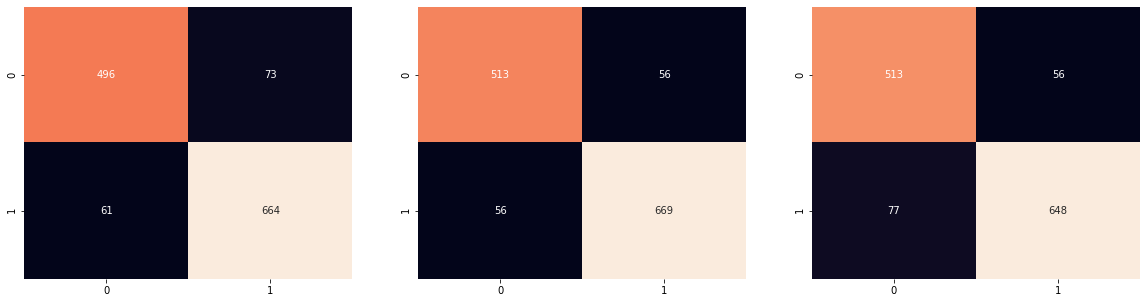

In [6]:
# Load Models
modelA = load_model('modelos/modeloA.h5')
modelB = load_model('modelos/modeloB.h5')
modelC = load_model('modelos/modeloC.h5')

# Predictions
predictionsA = modelA.predict(x=Xtest, batch_size=10, verbose=0)
predictionsB = modelB.predict(x=Xtest, batch_size=10, verbose=0)
predictionsC = modelC.predict(x=Xtest, batch_size=10, verbose=0)

# Rounded Predictions
rounded_predictionsA = np.round(predictionsA)
rounded_predictionsB = np.round(predictionsB)
rounded_predictionsC = np.round(predictionsC)

# Confusion Matrix
cmA = pd.DataFrame(confusion_matrix(y_true = Ytest, y_pred = rounded_predictionsA))
cmB = pd.DataFrame(confusion_matrix(y_true = Ytest, y_pred = rounded_predictionsB))
cmC = pd.DataFrame(confusion_matrix(y_true = Ytest, y_pred = rounded_predictionsC))

fig, axs = plt.subplots(1,3, figsize=(20,5))
sn.heatmap(cmA, annot = True, fmt="d", ax=axs[0], cbar=False)
sn.heatmap(cmB, annot = True, fmt="d", ax=axs[1], cbar=False)
sn.heatmap(cmC, annot = True, fmt="d", ax=axs[2], cbar=False)

# Accuracy Scores
AccA = accuracy_score(y_true = Ytest, y_pred = rounded_predictionsA)
AccB = accuracy_score(y_true = Ytest, y_pred = rounded_predictionsB)
AccC = accuracy_score(y_true = Ytest, y_pred = rounded_predictionsC)
BAccA = balanced_accuracy_score(y_true = Ytest, y_pred = rounded_predictionsA)
BAccB = balanced_accuracy_score(y_true = Ytest, y_pred = rounded_predictionsB)
BAccC = balanced_accuracy_score(y_true = Ytest, y_pred = rounded_predictionsC)

print("                      A          B          C")
print("         Accuracy -> ", np.round(AccA, 5), "%", np.round(AccB, 5), "%", np.round(AccC, 5), "%")
print("Balanced Accuracy -> ", np.round(BAccA, 5), "%", np.round(BAccB, 5), "%", np.round(BAccC, 5), "%")

### Training vs Validation Accuracy

NameError: name 'historyA' is not defined

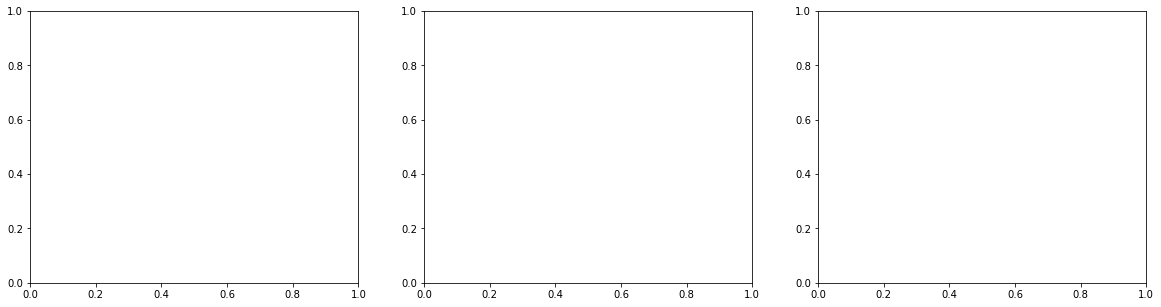

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(historyA.history['accuracy'])
ax[0].plot(historyA.history['val_accuracy'])
ax[1].plot(historyB.history['accuracy'])
ax[1].plot(historyB.history['val_accuracy'])
ax[2].plot(historyC.history['accuracy'])
ax[2].plot(historyC.history['val_accuracy'])

### Training vs Validation Loss

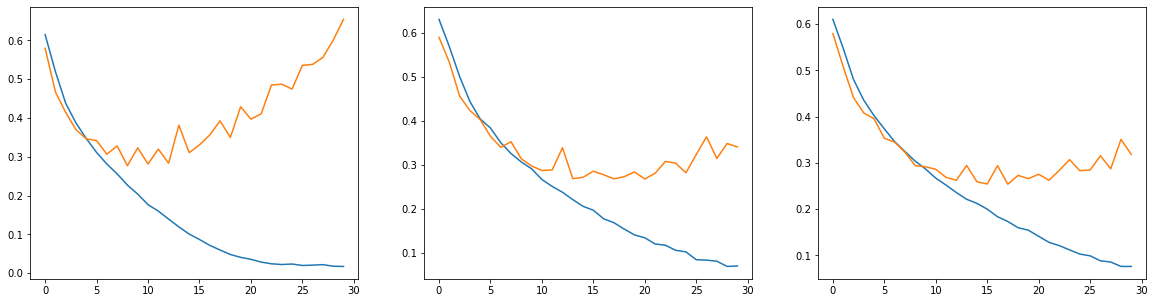

In [138]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(historyA.history['loss'])
ax[0].plot(historyA.history['val_loss'])
ax[1].plot(historyB.history['loss'])
ax[1].plot(historyB.history['val_loss'])
ax[2].plot(historyC.history['loss'])
ax[2].plot(historyC.history['val_loss'])

### Roc Curve

A area -> 0.8937834070662384
B area -> 0.9121701715047573
C area -> 0.8976874128840677


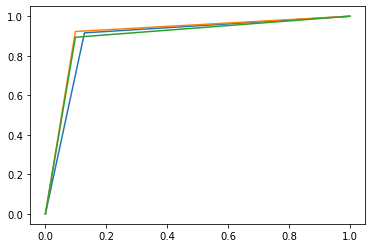

In [140]:
false_positive_rateA, true_positive_rateA, thresholdA = roc_curve(Ytest, rounded_predictionsA)
false_positive_rateB, true_positive_rateB, thresholdB = roc_curve(Ytest, rounded_predictionsB)
false_positive_rateC, true_positive_rateC, thresholdC = roc_curve(Ytest, rounded_predictionsC)
plt.plot(false_positive_rateA, true_positive_rateA)
plt.plot(false_positive_rateB, true_positive_rateB)
plt.plot(false_positive_rateC, true_positive_rateC)
print("A area ->", np.round(auc(false_positive_rateA, true_positive_rateA)))
print("B area ->", np.round(auc(false_positive_rateB, true_positive_rateB)))
print("C area ->", np.round(auc(false_positive_rateC, true_positive_rateC)))

# Binary Neural Network D - EarlyStopped Model B
### Create Neural Network

In [9]:
callback = EarlyStopping(monitor="val_loss", mode="auto", min_delta=1e-3, patience=5, restore_best_weights=True)
modelD = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
modelD.summary()
optimizer = RMSprop(learning_rate=0.0001)
modelD.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 128)        

### Network Train

In [10]:
historyD = modelD.fit(x=X, y=Y, validation_split = 0.2, batch_size=10, epochs=30, shuffle=True, verbose=2, callbacks=[callback])
modelD.save('modelos/modeloD.h5')

Epoch 1/30
518/518 - 23s - loss: 0.6349 - accuracy: 0.6327 - val_loss: 0.5971 - val_accuracy: 0.6731
Epoch 2/30
518/518 - 19s - loss: 0.5761 - accuracy: 0.6886 - val_loss: 0.5529 - val_accuracy: 0.7148
Epoch 3/30
518/518 - 21s - loss: 0.5183 - accuracy: 0.7432 - val_loss: 0.4796 - val_accuracy: 0.7689
Epoch 4/30
518/518 - 26s - loss: 0.4558 - accuracy: 0.7844 - val_loss: 0.4111 - val_accuracy: 0.8176
Epoch 5/30
518/518 - 27s - loss: 0.4086 - accuracy: 0.8174 - val_loss: 0.3812 - val_accuracy: 0.8346
Epoch 6/30
518/518 - 19s - loss: 0.3757 - accuracy: 0.8358 - val_loss: 0.3692 - val_accuracy: 0.8369
Epoch 7/30
518/518 - 20s - loss: 0.3492 - accuracy: 0.8460 - val_loss: 0.3292 - val_accuracy: 0.8586
Epoch 8/30
518/518 - 19s - loss: 0.3273 - accuracy: 0.8553 - val_loss: 0.3157 - val_accuracy: 0.8655
Epoch 9/30
518/518 - 22s - loss: 0.3003 - accuracy: 0.8688 - val_loss: 0.3027 - val_accuracy: 0.8624
Epoch 10/30
518/518 - 19s - loss: 0.2804 - accuracy: 0.8825 - val_loss: 0.2970 - val_accura

# Binary Neural Network E - EarlyStopped Model C
### Create Neural Network

In [14]:
callback = EarlyStopping(monitor="val_loss", mode="auto", min_delta=1e-3, patience=5, restore_best_weights=True)
modelE = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(50,50,1)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
modelE.summary()
learning_rate_decay = ExponentialDecay(0.0001, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = RMSprop(learning_rate_decay)
modelE.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 128)        

### Network Train

In [15]:
historyE = modelE.fit(x=X, y=Y, validation_split = 0.2, batch_size=10, epochs=30, shuffle=True, verbose=2, callbacks=[callback])
modelE.save('modelos/modeloE.h5')

Epoch 1/30
518/518 - 23s - loss: 0.6258 - accuracy: 0.6316 - val_loss: 0.5946 - val_accuracy: 0.6917
Epoch 2/30
518/518 - 20s - loss: 0.5618 - accuracy: 0.7092 - val_loss: 0.5302 - val_accuracy: 0.7334
Epoch 3/30
518/518 - 21s - loss: 0.5000 - accuracy: 0.7548 - val_loss: 0.4677 - val_accuracy: 0.7798
Epoch 4/30
518/518 - 24s - loss: 0.4494 - accuracy: 0.7877 - val_loss: 0.4260 - val_accuracy: 0.8145
Epoch 5/30
518/518 - 21s - loss: 0.4108 - accuracy: 0.8155 - val_loss: 0.3853 - val_accuracy: 0.8315
Epoch 6/30
518/518 - 19s - loss: 0.3821 - accuracy: 0.8308 - val_loss: 0.3670 - val_accuracy: 0.8393
Epoch 7/30
518/518 - 26s - loss: 0.3536 - accuracy: 0.8464 - val_loss: 0.3596 - val_accuracy: 0.8462
Epoch 8/30
518/518 - 27s - loss: 0.3317 - accuracy: 0.8557 - val_loss: 0.3582 - val_accuracy: 0.8431
Epoch 9/30
518/518 - 21s - loss: 0.3122 - accuracy: 0.8607 - val_loss: 0.3130 - val_accuracy: 0.8640
Epoch 10/30
518/518 - 21s - loss: 0.2911 - accuracy: 0.8810 - val_loss: 0.2994 - val_accura

# Compare Models

In [28]:
modelD = load_model('modelos/modeloD.h5')
modelE = load_model('modelos/modeloE.h5')

predictionsD = modelD.predict(x=Xtest, batch_size=10, verbose=0)
predictionsE = modelE.predict(x=Xtest, batch_size=10, verbose=0)
rounded_predictionsD = np.round(predictionsD)
rounded_predictionsE = np.round(predictionsE)

AccD = accuracy_score(y_true = Ytest, y_pred = rounded_predictionsD)
AccE = accuracy_score(y_true = Ytest, y_pred = rounded_predictionsE)
BAccD = balanced_accuracy_score(y_true = Ytest, y_pred = rounded_predictionsD)
BAccE = balanced_accuracy_score(y_true = Ytest, y_pred = rounded_predictionsE)

print("         Accuracy -> ", np.round(AccD, 5), "%", np.round(AccE, 5), "%")
print("Balanced Accuracy -> ", np.round(BAccD, 5), "%", np.round(BAccE, 5), "%")

         Accuracy ->  0.9034 % 0.89026 %
Balanced Accuracy ->  0.9015 % 0.88694 %


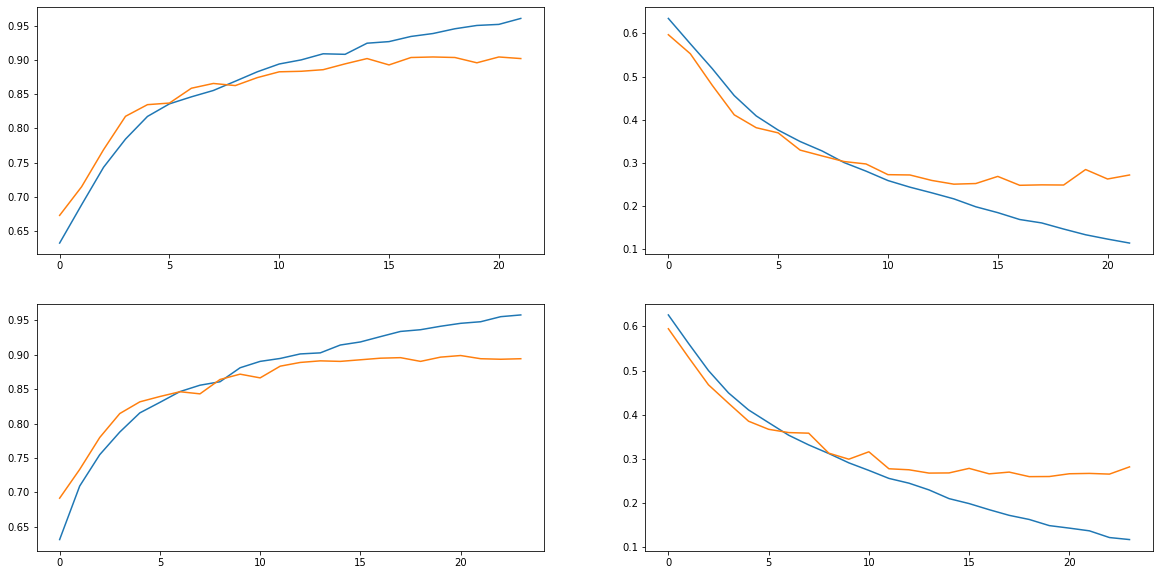

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].plot(historyD.history['accuracy'])
ax[0,0].plot(historyD.history['val_accuracy'])
ax[0,1].plot(historyD.history['loss'])
ax[0,1].plot(historyD.history['val_loss'])
ax[1,0].plot(historyE.history['accuracy'])
ax[1,0].plot(historyE.history['val_accuracy'])
ax[1,1].plot(historyE.history['loss'])
ax[1,1].plot(historyE.history['val_loss'])

# Model Choice and Prediction

In [29]:
final_model = load_model('modelos/modeloD.h5')
predictions = final_model.predict(x=XTrue, batch_size=10, verbose=0)
rounded_predictions = np.round(predictions)
rounded_predictions = rounded_predictions.squeeze()

### Generate YTrue

In [30]:
np.save("Ytest_Classification_Part1", rounded_predictions)

1.0


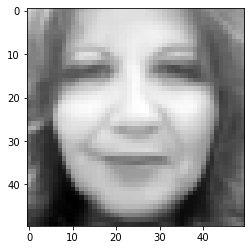

In [23]:
i = 58
plt.imshow(XTrue[i], cmap='gray')
print(rounded_predictions[i])

In [24]:
rounded_predictions.shape

(1164,)